In [64]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [65]:
from sklearn.metrics import mean_absolute_error

In [66]:
from pandas.plotting import autocorrelation_plot

In [67]:
# Arima model -> FORECASTIG TECHNIQUE
from statsmodels.tsa.arima_model import ARIMA

In [68]:
data = pd.read_csv('https://drive.google.com/uc?id=1PzAcx0rnsAs96qnAdH9is8JMF9WUHj_W')


In [69]:
data

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index
0,IND,India,1/16/2021,181,15144,803090,191181,15.144,803.090,191.181,68.98
1,IND,India,1/17/2021,145,13788,779377,33120,13.788,779.377,33.120,68.98
2,IND,India,1/18/2021,137,10050,548168,229748,10.050,548.168,229.748,68.98
3,IND,India,1/19/2021,162,13816,709791,220786,13.816,709.791,220.786,68.98
4,IND,India,1/20/2021,151,15244,764120,131649,15.244,764.120,131.649,68.98
...,...,...,...,...,...,...,...,...,...,...,...
455,JPN,Japan,6/28/2021,38,1007,62615,1272917,1.007,62.615,1272.917,53.24
456,JPN,Japan,6/29/2021,30,1401,61916,1288180,1.401,61.916,1288.180,53.24
457,JPN,Japan,6/30/2021,41,1820,67576,1280465,1.820,67.576,1280.465,53.24
458,JPN,Japan,07/01/21,24,1733,77063,1054779,1.733,77.063,1054.779,53.24


### How many country ?

In [70]:
data['location'].unique()

array(['India', 'Israel', 'Japan'], dtype=object)

### Date

In [71]:
country = "India"
data = data[data['location']==country]
data['date']=pd.to_datetime(data['date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_16524\2750926933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=pd.to_datetime(data['date'])


In [72]:
data

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index
0,IND,India,2021-01-16,181,15144,803090,191181,15.144,803.090,191.181,68.98
1,IND,India,2021-01-17,145,13788,779377,33120,13.788,779.377,33.120,68.98
2,IND,India,2021-01-18,137,10050,548168,229748,10.050,548.168,229.748,68.98
3,IND,India,2021-01-19,162,13816,709791,220786,13.816,709.791,220.786,68.98
4,IND,India,2021-01-20,151,15244,764120,131649,15.244,764.120,131.649,68.98
...,...,...,...,...,...,...,...,...,...,...,...
151,IND,India,2021-07-01,853,46617,1921450,5583510,46.617,1921.450,5583.510,81.94
152,IND,India,2021-07-02,738,44111,2230026,930145,44.111,2230.026,930.145,81.94
153,IND,India,2021-07-03,955,43071,2164943,8628796,43.071,2164.943,8628.796,81.94
154,IND,India,2021-07-04,723,39796,1838490,3077960,39.796,1838.490,3077.960,81.94


In [73]:
data.sort_values('date',ascending=True,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16524\2383877341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('date',ascending=True,inplace=True)


In [74]:
data['date'].min(), data['date'].max()

(Timestamp('2021-01-16 00:00:00'), Timestamp('2021-07-05 00:00:00'))

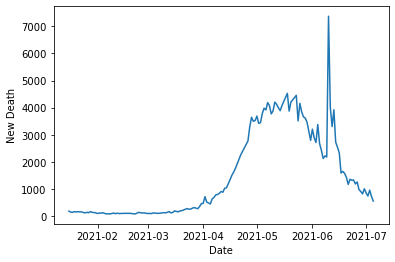

In [75]:
plt.xlabel('Date')
plt.ylabel('New Death')
plt.plot(data['date'],data['new_deaths'])

In [76]:
rolling_mean5 = data['new_deaths'].rolling(window=5).mean()
rolling_mean10 = data['new_deaths'].rolling(window=10).mean()
rolling_mean15= data['new_deaths'].rolling(window=15).mean()
rolling_mean20 = data['new_deaths'].rolling(window=20).mean()
# rolling_mean100 = data['new_deaths'].rolling(window=100).mean()

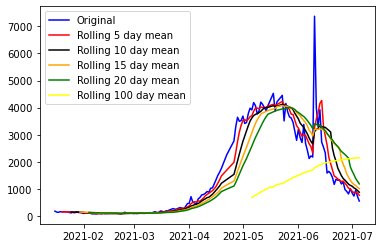

In [77]:
plt.plot(data['date'],data['new_deaths'], color = 'blue', label = 'Original')
plt.plot(data['date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')
plt.plot(data['date'],rolling_mean100, color = 'yellow', label = 'Rolling 100 day mean')


plt.legend(loc='best')
plt.show()

In [78]:
data['moving_avg_5day'] = rolling_mean5
data['moving_avg_10day'] = rolling_mean10
data['moving_avg_15day'] = rolling_mean15
data['moving_avg_20day'] = rolling_mean20
# data['moving_avg_100day'] = rolling_mean100

data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16524\1146943661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moving_avg_5day'] = rolling_mean5
C:\Users\Admin\AppData\Local\Temp\ipykernel_16524\1146943661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moving_avg_10day'] = rolling_mean10
C:\Users\Admin\AppData\Local\Temp\ipykernel_16524\1146943661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
0,IND,India,2021-01-16,181,15144,803090,191181,15.144,803.090,191.181,68.98,NaN,NaN,NaN,NaN
1,IND,India,2021-01-17,145,13788,779377,33120,13.788,779.377,33.120,68.98,NaN,NaN,NaN,NaN
2,IND,India,2021-01-18,137,10050,548168,229748,10.050,548.168,229.748,68.98,NaN,NaN,NaN,NaN
3,IND,India,2021-01-19,162,13816,709791,220786,13.816,709.791,220.786,68.98,NaN,NaN,NaN,NaN
4,IND,India,2021-01-20,151,15244,764120,131649,15.244,764.120,131.649,68.98,155.2,NaN,NaN,NaN


In [79]:
# Removing first 5 for removing having Na due to lack of OLD
data.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16524\536596780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [80]:
data

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
19,IND,India,2021-02-04,120,12408,742841,509893,12.408,742.841,509.893,61.57,109.8,123.6,130.266667,136.50
20,IND,India,2021-02-05,95,11713,715776,457404,11.713,715.776,457.404,61.57,105.2,119.4,125.733333,132.20
21,IND,India,2021-02-06,78,12059,740794,358473,12.059,740.794,358.473,61.57,102.0,114.9,120.800000,128.85
22,IND,India,2021-02-07,84,11831,695789,37040,11.831,695.789,37.040,61.57,96.8,107.0,116.066667,126.20
23,IND,India,2021-02-08,78,9110,532236,446646,9.110,532.236,446.646,61.57,91.0,101.1,112.533333,122.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,IND,India,2021-07-01,853,46617,1921450,5583510,46.617,1921.450,5583.510,81.94,912.2,1101.0,1227.266667,1661.55
152,IND,India,2021-07-02,738,44111,2230026,930145,44.111,2230.026,930.145,81.94,864.0,1039.0,1170.666667,1533.30
153,IND,India,2021-07-03,955,43071,2164943,8628796,43.071,2164.943,8628.796,81.94,873.6,1002.4,1124.533333,1385.00
154,IND,India,2021-07-04,723,39796,1838490,3077960,39.796,1838.490,3077.960,81.94,854.8,941.8,1068.000000,1284.85


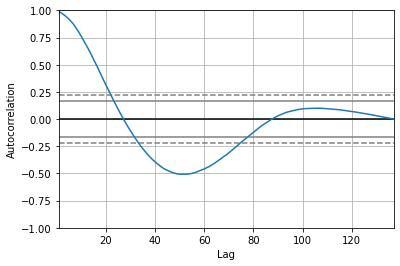

In [81]:
autocorrelation_plot(data['new_cases'])
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


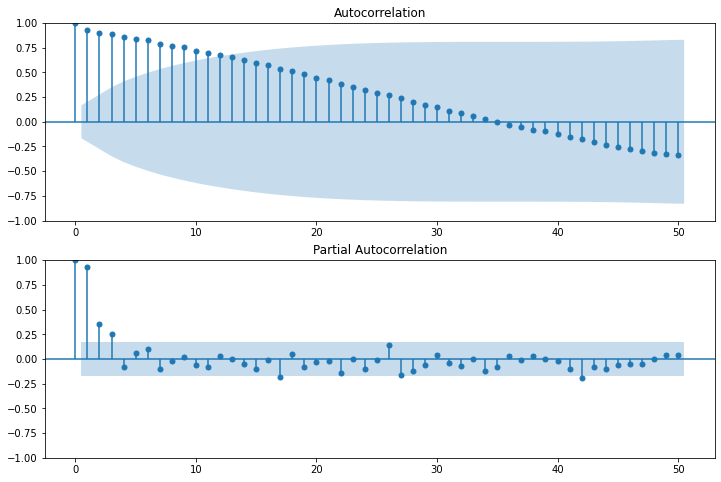

In [82]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['new_deaths'].dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['new_deaths'].dropna(),lags=50,ax=ax2)

In [ ]:
# -->  

# 1,1,0 -> Arima Model

In [91]:
from statsmodels.tsa.arima.model import ARIMA

In [92]:
model = ARIMA(data.new_deaths, order = (1,1,0))
model_fit=model.fit() 
print(model_fit.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             new_deaths   No. Observations:                  137
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1051.418
Date:                Fri, 07 Oct 2022   AIC                           2106.835
Time:                        01:06:43   BIC                           2112.661
Sample:                             0   HQIC                          2109.203
                                - 137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3609      0.030    -12.046      0.000      -0.420      -0.302
sigma2      3.058e+05   6921.383     44.183      0.000    2.92e+05    3.19e+05
Ljung-Box (L1) (Q):                   1.14   Jarque-

In [93]:
# 1,1,0 ARIMA MODEL 
# 5 day lag -> 5 days output
model = ARIMA(data.new_deaths, order = (5,1,0))
model_fit=model.fit() 
print(model_fit.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             new_deaths   No. Observations:                  137
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1046.078
Date:                Fri, 07 Oct 2022   AIC                           2104.157
Time:                        01:10:45   BIC                           2121.633
Sample:                             0   HQIC                          2111.259
                                - 137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4359      0.046     -9.484      0.000      -0.526      -0.346
ar.L2         -0.2243      0.059     -3.826      0.000      -0.339      -0.109
ar.L3          0.0131      0.100      0.130      0.8

Test MAE: 130.958


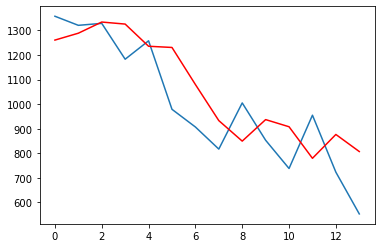

In [94]:
X = data['new_deaths'].values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [95]:
mae5day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_20day'])

In [96]:
print(f'Mean absolute error from 5day moving average prediction: {mae5day}')
print(f'Mean absolute error from 10day moving average prediction: {mae10day}')
print(f'Mean absolute error from 15day moving average prediction: {mae15day}')
print(f'Mean absolute error from 20day moving average prediction: {mae20day}')

Mean absolute error from 5day moving average prediction: 110.38571428571426
Mean absolute error from 10day moving average prediction: 297.4928571428572
Mean absolute error from 15day moving average prediction: 670.4666666666666
Mean absolute error from 20day moving average prediction: 991.2785714285712
